In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset Loading NTT Stock Price Data**

In [4]:
# Loading the dataset
file_path = 'stock_price.csv'
stock_data = pd.read_csv(file_path)

In [5]:
# Converting '日付け' from object to datetime format
stock_data['日付け'] = pd.to_datetime(stock_data['日付け'])

**Exploratory Data Analysis of the data**

In [6]:
# Helper function to convert volume strings with 'M' and 'B' to float
def convert_volume(value):
    if 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif 'B' in value:
        return float(value.replace('B', '')) * 1e9
    else:
        return float(value)

In [7]:
# Applying the conversion function to '出来高'
stock_data['出来高'] = stock_data['出来高'].apply(convert_volume)

In [8]:
# Converting '変化率 %' from object to float (removing the '%' sign)
stock_data['変化率 %'] = stock_data['変化率 %'].str.rstrip('%').astype(float)

In [9]:
print(stock_data.info())
print(stock_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日付け     9202 non-null   datetime64[ns]
 1   終値      9202 non-null   float64       
 2   始値      9202 non-null   float64       
 3   高値      9202 non-null   float64       
 4   安値      9202 non-null   float64       
 5   出来高     9202 non-null   float64       
 6   変化率 %   9202 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 503.4 KB
None
         日付け     終値     始値     高値     安値          出来高  変化率 %
0 2024-08-01  156.3  159.3  159.4  156.1   79150000.0  -2.56
1 2024-07-31  160.4  158.2  160.7  158.1  173910000.0   1.07
2 2024-07-30  158.7  158.8  159.2  158.0  138140000.0  -0.63
3 2024-07-29  159.7  158.7  160.2  158.4  126280000.0   1.14
4 2024-07-26  157.9  159.3  159.6  157.9  155080000.0  -0.13


In [10]:
# Printing the statistical summary for numerical columns
print(stock_data.describe())

                                 日付け           終値           始値           高値  \
count                           9202  9202.000000  9202.000000  9202.000000   
mean   2005-10-21 08:44:04.642469248    92.180961    92.256183    93.176451   
min              1987-02-12 00:00:00    33.000000    33.000000    33.200000   
25%              1996-06-06 06:00:00    52.000000    52.100000    52.800000   
50%              2005-10-11 12:00:00    85.100000    85.100000    86.050000   
75%              2015-03-04 18:00:00   110.800000   110.800000   111.900000   
max              2024-08-01 00:00:00   305.900000   309.800000   311.800000   
std                              NaN    50.452228    50.598215    51.049837   

                安値           出来高        変化率 %  
count  9202.000000  9.202000e+03  9202.000000  
mean     91.330146  1.726677e+08     0.017502  
min      32.200000  9.340000e+06   -14.740000  
25%      51.500000  8.073000e+07    -0.940000  
50%      84.200000  1.540150e+08     0.000000  


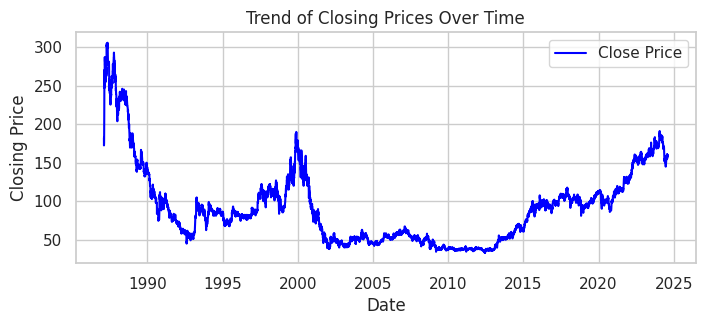

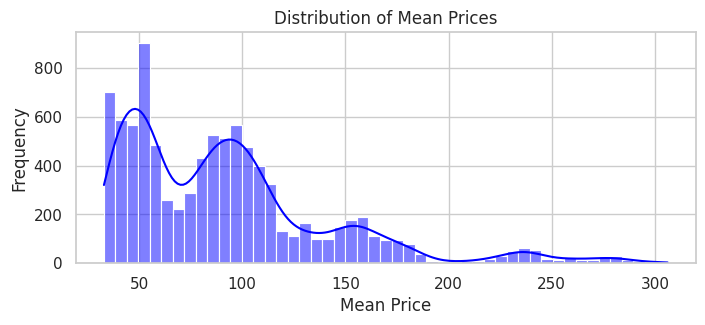

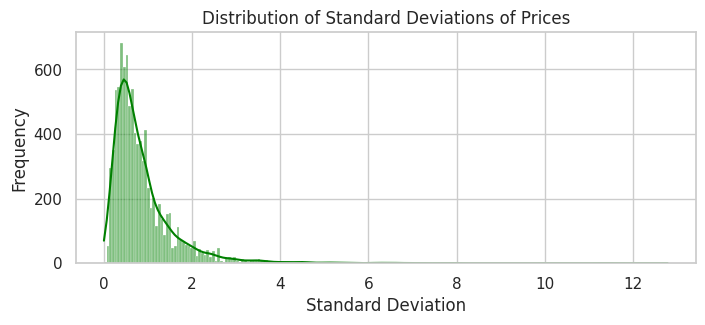

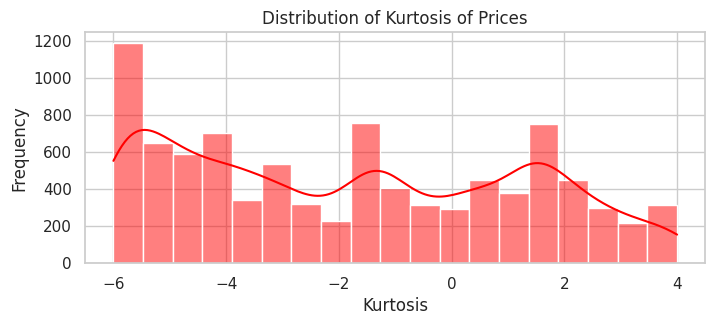

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# Plotting trends of '終値' (Closing Price) over time
plt.figure(figsize=(8, 3))
plt.plot(stock_data['日付け'], stock_data['終値'], label='Close Price', color='blue')
plt.title('Trend of Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

stock_data['Mean'] = stock_data[['始値', '高値', '安値', '終値']].mean(axis=1)
stock_data['Std Dev'] = stock_data[['始値', '高値', '安値', '終値']].std(axis=1)
stock_data['Kurtosis'] = stock_data[['始値', '高値', '安値', '終値']].kurt(axis=1)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting distribution of the Mean
plt.figure(figsize=(8, 3))
sns.histplot(stock_data['Mean'], kde=True, color='blue')
plt.title('Distribution of Mean Prices')
plt.xlabel('Mean Price')
plt.ylabel('Frequency')
plt.show()

# Plotting distribution of the Standard Deviations
plt.figure(figsize=(8, 3))
sns.histplot(stock_data['Std Dev'], kde=True, color='green')
plt.title('Distribution of Standard Deviations of Prices')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.show()

# Plotting distribution of the Kurtosis
plt.figure(figsize=(8, 3))
sns.histplot(stock_data['Kurtosis'], kde=True, color='red')
plt.title('Distribution of Kurtosis of Prices')
plt.xlabel('Kurtosis')
plt.ylabel('Frequency')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 32066 (\N{CJK UNIFIED IDEOGRAPH-7D42}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  fig.canvas.

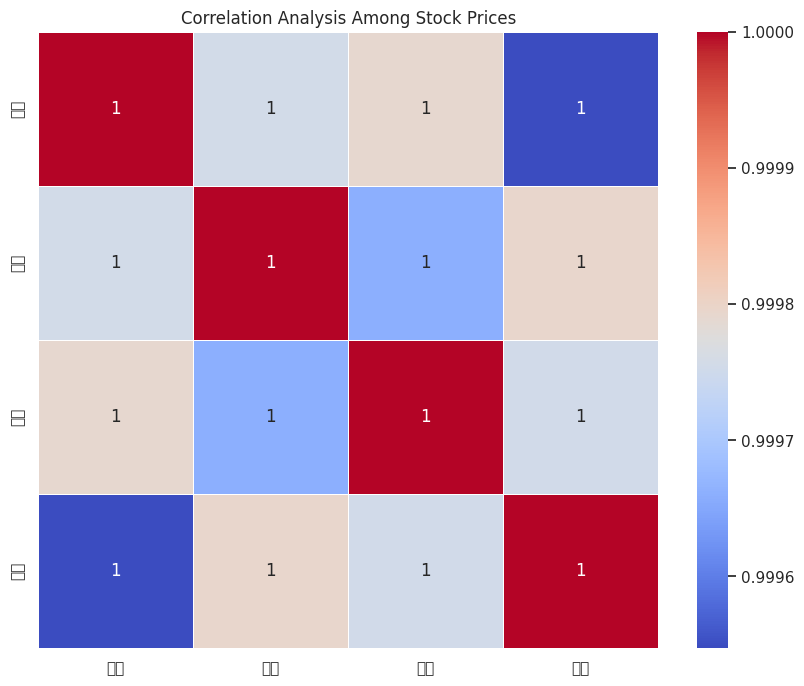

In [45]:
# Calculating the correlation matrix
price_data = stock_data[['始値', '高値', '安値', '終値']]
correlation_matrix = price_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Analysis Among Stock Prices')
plt.show()


In [12]:
# Checking for any NaN values in the dataset
nan_summary = stock_data.isna().sum()

nan_summary

,0
日付け,0
終値,0
始値,0
高値,0
安値,0
出来高,0
変化率 %,0


In [13]:
# Creating lag features for '終値' (Closing Price)
for lag in [1, 2, 3, 4, 5]:
    stock_data[f'lag_{lag}'] = stock_data['終値'].shift(lag)

# Creating moving averages for '終値' (Closing Price)
for window in [3, 7, 14]:
    stock_data[f'ma_{window}'] = stock_data['終値'].rolling(window=window).mean()

stock_data.head(20)

,日付け,終値,始値,高値,安値,出来高,変化率 %,lag_1,lag_2,lag_3,lag_4,lag_5,ma_3,ma_7,ma_14
0,2024-08-01,156.3,159.3,159.4,156.1,79150000.0,-2.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-07-31,160.4,158.2,160.7,158.1,173910000.0,1.07,156.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-07-30,158.7,158.8,159.2,158.0,138140000.0,-0.63,160.4,156.3,NaN,NaN,NaN,158.466667,NaN,NaN
3,2024-07-29,159.7,158.7,160.2,158.4,126280000.0,1.14,158.7,160.4,156.3,NaN,NaN,159.600000,NaN,NaN
4,2024-07-26,157.9,159.3,159.6,157.9,155080000.0,-0.13,159.7,158.7,160.4,156.3,NaN,158.766667,NaN,NaN
5,2024-07-25,158.1,157.0,159.0,156.8,190620000.0,-0.25,157.9,159.7,158.7,160.4,156.3,158.566667,NaN,NaN
6,2024-07-24,158.5,160.0,160.4,158.4,168570000.0,-1.37,158.1,157.9,159.7,158.7,160.4,158.166667,158.514286,NaN
7,2024-07-23,160.7,161.6,161.7,159.8,165790000.0,0.50,158.5,158.1,157.9,159.7,158.7,159.100000,159.142857,NaN
8,2024-07-22,159.9,159.5,159.9,157.9,136120000.0,0.57,160.7,158.5,158.1,157.9,159.7,159.700000,159.071429,NaN
9,2024-07-19,159.0,160.1,160.9,158.7,166570000.0,-1.12,159.9,160.7,158.5,158.1,157.9,159.866667,159.114286,NaN


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cleaned_data = stock_data.dropna()

# Defining the features and target variable for the further processing
features = cleaned_data.drop(['日付け', '終値'], axis=1)  # Dropping '日付け' as it's not a feature and '終値' is the target
target = cleaned_data['終値']

In [15]:
# Normalizing the feature data using Min-Max Scaling
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Displaying the shapes of the splits to verify
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7351, 13), (1838, 13), (7351,), (1838,))

###**Models Evaluation**

**ARIMA (Autoregressive integrated moving average)**

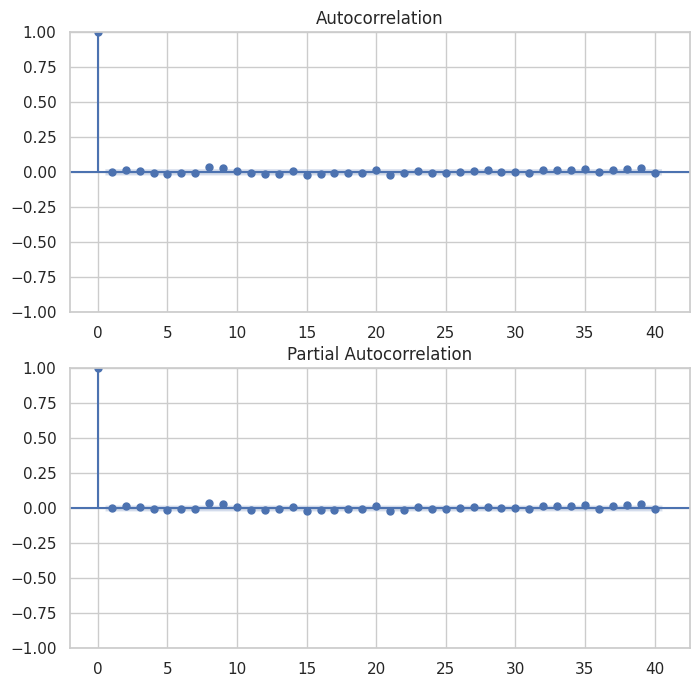

,0
Test Statistic,-27.597363
p-value,0.000000
#Lags Used,8.000000
Number of Observations Used,7342.000000
Critical Value (1%),-3.431241
Critical Value (5%),-2.861934
Critical Value (10%),-2.566980


In [46]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Since ARIMA requires stationary data, let's first check if our target variable is stationary
from statsmodels.tsa.stattools import adfuller

# Performing Dickey-Fuller test:
result = adfuller(y_train)

# Displaying the ADF test results
df_results = pd.Series(result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in result[4].items():
    df_results[f'Critical Value ({key})'] = value

# Plot ACF and PACF for '終値'
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
plot_acf(y_train, lags=40, ax=ax1)
plot_pacf(y_train, lags=40, ax=ax2)
plt.show()

df_results


In [17]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Fitting ARIMA model with p=1, d=0, q=0
model_arima = ARIMA(y_train, order=(1, 0, 0))
fitted_model = model_arima.fit()

# Making predictions on the test set
y_pred_arima = fitted_model.forecast(steps=len(y_test))

# Calculating RMSE value for the evaluation metric
rmse_arima = np.sqrt(np.mean((y_pred_arima - y_test) ** 2))


rmse_arima

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

80.44412492545776

**LSTM (Long Short Term Memory)**

In [18]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

# Reshaping the input to be [samples, time steps, features] which is required for LSTM
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

model_lstm = Sequential([
    LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(1)
])

# Compiling the model with Adam optimizer and mean squared error loss
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

history = model_lstm.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

# Predicting LSTM model on the test set
y_pred_lstm = model_lstm.predict(X_test_reshaped)

# Calculating RMSE value for the evaluation metric
rmse_lstm = np.sqrt(np.mean((y_pred_lstm.flatten() - y_test) ** 2))

print('RMSE for LSTM:', rmse_lstm)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 10920.2920 - val_loss: 8957.4404
Epoch 2/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8566.3281 - val_loss: 6834.5410
Epoch 3/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6482.2065 - val_loss: 5420.2222
Epoch 4/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5319.3003 - val_loss: 4439.8013
Epoch 5/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4125.8096 - val_loss: 3729.8223
Epoch 6/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3718.5522 - val_loss: 3214.6619
Epoch 7/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3206.2114 - val_loss: 2829.0176
Epoch 8/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2705.3367 - val_loss: 2523.9492
Epoch 9/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2414.2351 - val_loss: 2242.9009
Epoch 10/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2215.3247 - val_loss: 1961.2228
Epoch 11/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1987.1722 - val_l

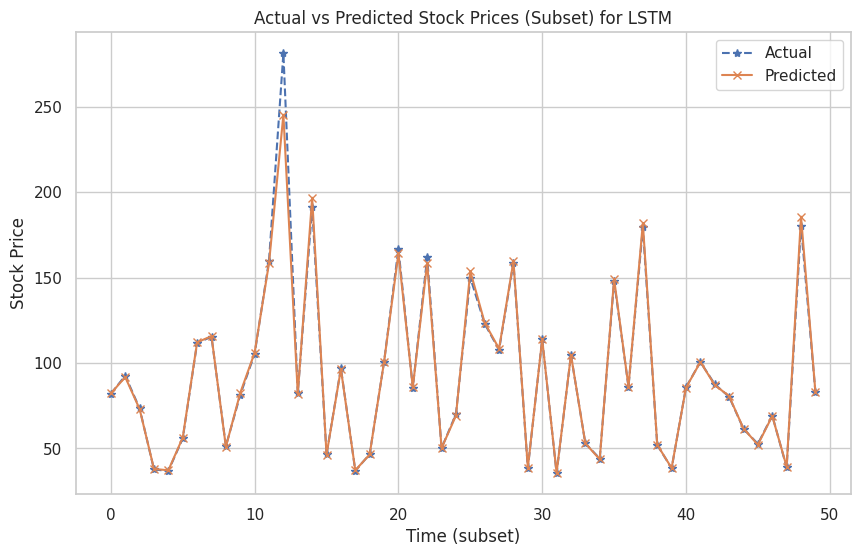

In [48]:
# Selecting a subset of the data for a clearer plot
subset_length = 50

plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True)[:subset_length], label='Actual', marker='*', linestyle='--') #plot for actual
plt.plot(y_pred_lstm.flatten()[:subset_length], label='Predicted', marker='x', linestyle='-')  #plot for prediction
plt.title('Actual vs Predicted Stock Prices (Subset) for LSTM')
plt.xlabel('Time (subset)')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


**Adding some changes in configuration of LSTM**

In [20]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.optimizers import Adam

X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

model_enhanced = Sequential([
    Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.2),
    LSTM(30),
    Dense(1)
])

model_enhanced.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

history = model_enhanced.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, validation_data=(X_test_reshaped, y_test), verbose=1)

y_pred_lstm = model_lstm.predict(X_test_reshaped)

rmse_lstm = np.sqrt(np.mean((y_pred_lstm.flatten() - y_test) ** 2))

print('RMSE for LSTM:', rmse_lstm)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 10616.6348 - val_loss: 9449.9707
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9463.9209 - val_loss: 8736.0635
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8628.7002 - val_loss: 8244.2090
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8363.5576 - val_loss: 7812.5962
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7819.0522 - val_loss: 7420.3618
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7410.7925 - val_loss: 7055.6377
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7189.6890 - val_loss: 6714.3086
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6615.8970 - val_loss: 6395.2520
Epoch 9/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6356.6060 - val_loss: 6096.1313
Epoch 10/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6210.1084 - val_loss: 5814.2886
Epoch 11/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5725.0366 - val_

**Stacked LSTM : This consist of the multiple layers of the LSTM and dropout layers**

In [21]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Defining a stacked LSTM model
model_stacked_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dense(1)
])

model_stacked_lstm.compile(optimizer='adam', loss='mean_squared_error')

history = model_stacked_lstm.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

y_pred_stacked_lstm = model_stacked_lstm.predict(X_test_reshaped)
rmse_stacked_lstm = np.sqrt(np.mean((y_pred_stacked_lstm.flatten() - y_test) ** 2))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 10308.2793 - val_loss: 7796.6353
Epoch 2/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7612.9414 - val_loss: 6527.8301
Epoch 3/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6469.0894 - val_loss: 5558.8374
Epoch 4/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 5665.3081 - val_loss: 4792.2827
Epoch 5/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4967.3008 - val_loss: 4184.1328
Epoch 6/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3941.7375 - val_loss: 3711.7405
Epoch 7/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3756.9814 - val_loss: 3340.1143
Epoch 8/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 3249.7029 - val_loss: 2843.9565
Epoch 9/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2814.7734 - val_loss: 2497.0015
Epoch 10/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2429.0144 - val_loss: 2203.4453
Epoch 11/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 2237.0410 - val_loss: 1956.8

In [22]:
rmse_stacked_lstm

4.532024026343549

**GRU : Gated Recurrent Unit Network Model**

In [23]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout

# Defining a GRU model
model_gru = Sequential([
    GRU(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.2),
    GRU(50),
    Dense(1)
])

model_gru.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the model
history = model_gru.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

# Evaluating the model as before
y_pred_gru = model_gru.predict(X_test_reshaped)
rmse_gru = np.sqrt(np.mean((y_pred_gru.flatten() - y_test) ** 2))
rmse_gru

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 10095.1084 - val_loss: 7105.8945
Epoch 2/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6564.1611 - val_loss: 5641.9268
Epoch 3/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5574.4009 - val_loss: 4622.9160
Epoch 4/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4576.8848 - val_loss: 3889.3638
Epoch 5/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3600.3020 - val_loss: 3345.9985
Epoch 6/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3282.3271 - val_loss: 2766.4355
Epoch 7/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2651.6719 - val_loss: 2355.3064
Epoch 8/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2355.8164 - val_loss: 2021.1462
Epoch 9/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1956.6776 - val_loss: 1746.1600
Epoch 10/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1753.5118 - val_loss: 1528.1624
Epoch 11/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1542.4198 - val_loss: 1345.0

2.2471980999790646

###While we can observe over here that GRU performs better in perfomance than ARIMA,LSTM and stacked LSTM.

In [24]:
print(f"The RMSE value for the GRU model is {rmse_gru} ")

The RMSE value for the GRU model is 2.2471980999790646 


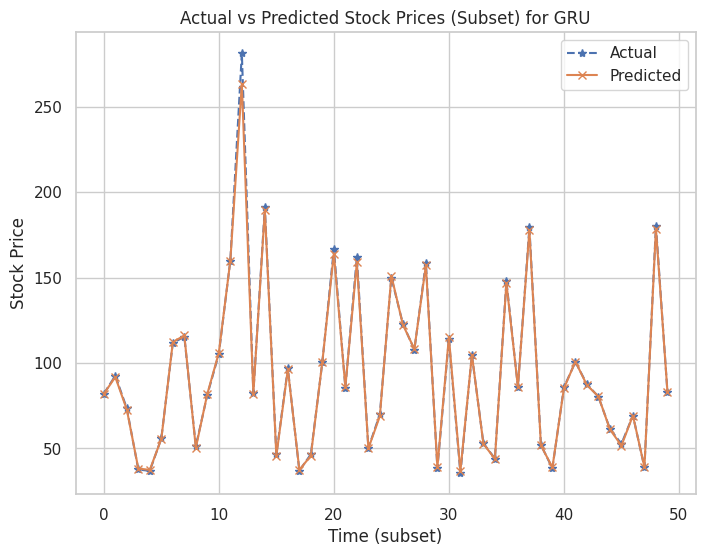

In [51]:
# Select a subset of the data for a clearer plot
subset_length = 50

plt.figure(figsize=(8, 6))
plt.plot(y_test.reset_index(drop=True)[:subset_length], label='Actual', marker='*', linestyle='--') #plot for actual
plt.plot(y_pred_gru.flatten()[:subset_length], label='Predicted', marker='x', linestyle='-')  #plot for prediction
plt.title('Actual vs Predicted Stock Prices (Subset) for GRU')
plt.xlabel('Time (subset)')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


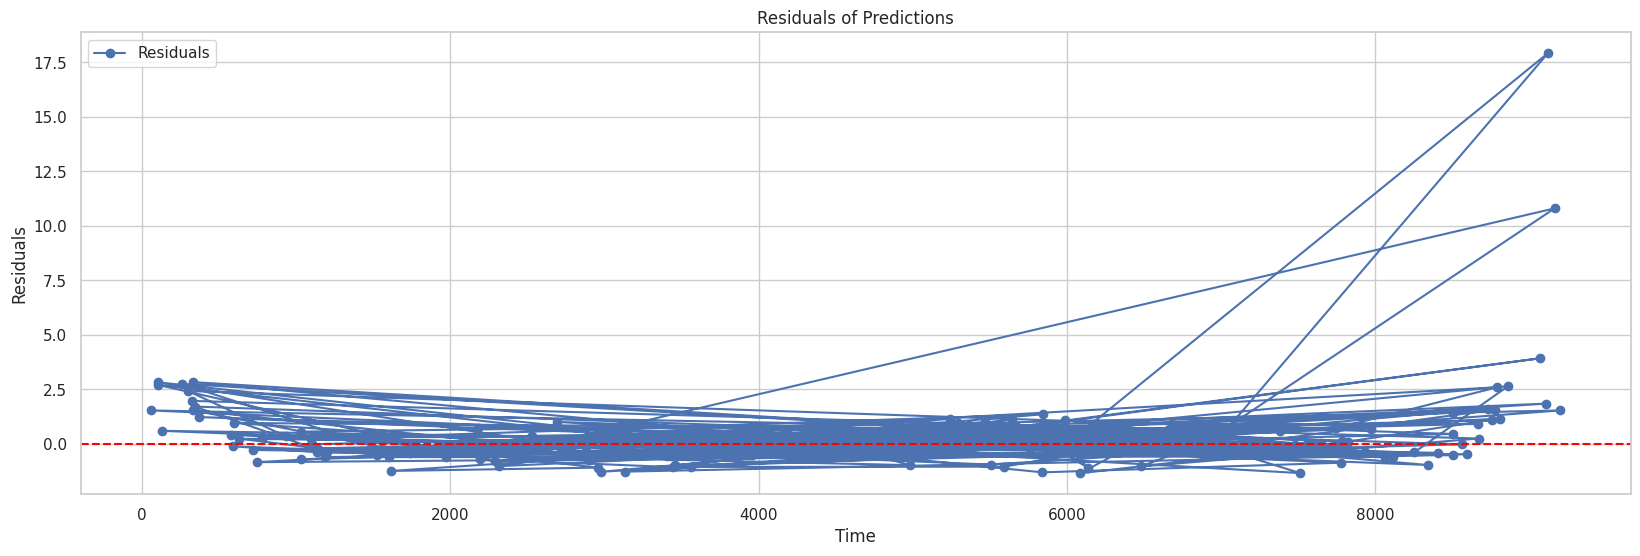

In [26]:
residuals = y_test - y_pred_gru.flatten()

plt.figure(figsize=(20, 6))
plt.plot(residuals[:200], label='Residuals', marker='o')
plt.title('Residuals of Predictions')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.legend()
plt.show()


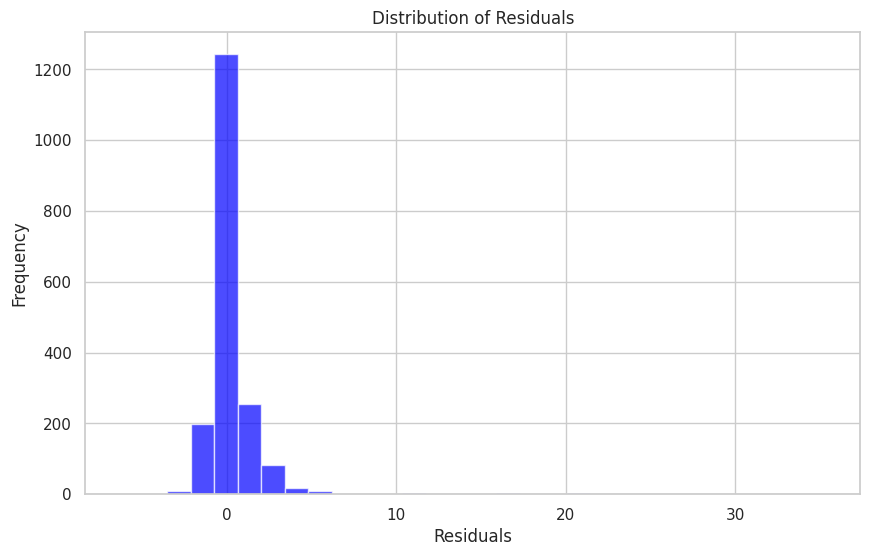

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


**XGBOOST : Extreme Gradient Boosting**

In [28]:
! pip install xgboost

In [29]:
from xgboost import XGBRegressor

# Defining the model
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, objective='reg:squarederror')

# Fitting the model
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

rmse_xgb = np.sqrt(np.mean((y_pred_xgb - y_test) ** 2))


In [30]:
rmse_xgb

1.0617201743829892

**As we can see that XGBOOST has totally outshined the performance of GRU too, while the RMSE value for XGBOOST comes out to be 1.0617 which is far better than GRU.**

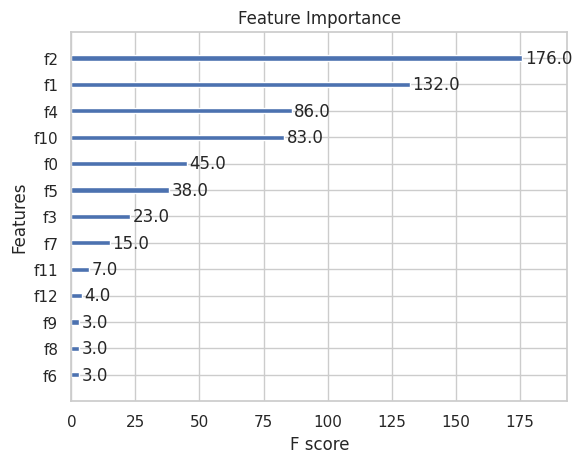

In [31]:
import matplotlib.pyplot as plt
import xgboost

# Plotting feature importance
xgboost.plot_importance(model_xgb)
plt.title('Feature Importance')
plt.show()


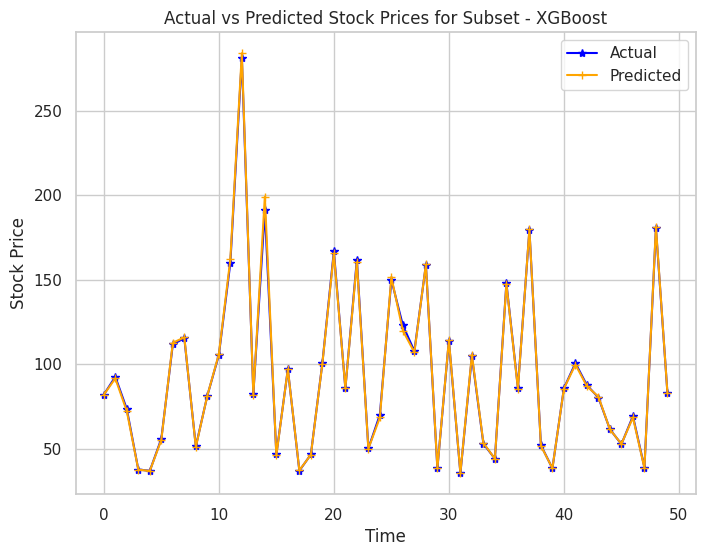

In [53]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_xgb are aligned and of the same length
plt.figure(figsize=(8, 6))
plt.plot(y_test.reset_index(drop=True)[:50], label='Actual', marker='*', linestyle='-', color='blue')
plt.plot(y_pred_xgb[:50], label='Predicted', marker='+', linestyle='-', color='orange')
plt.title('Actual vs Predicted Stock Prices for Subset - XGBoost')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


**We can say that XGBOOST is giving more better rmse values than GRU and LSTM**